In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path

In [2]:
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [3]:
# specifiy data directories

train_dir = r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_image'
test_dir = r'C:\Users\zy\Documents\CS5242\nus-cs5242\test_image'
training_labels = pd.read_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_label.csv')

In [4]:
# convert training labels to tuples

training_labels.head()
#train_labels = training_labels.to_records(index=False).tolist()
train_labels = training_labels.Label.tolist()

In [5]:
# create tf datasets and load data, note: didn't use graysacle as all pretrained models over imagenet are RGB 
batch_size = 32
img_height = 512
img_width = 512
num_classes = 3

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels=train_labels,
  label_mode='int',
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1164 files belonging to 1 classes.
Using 932 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels=train_labels,
  #color_mode='grayscale',
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1164 files belonging to 1 classes.
Using 232 files for validation.


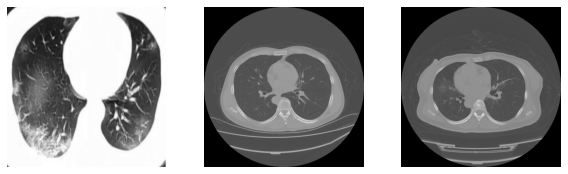

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(4, 512, 512, 3)
(4,)


In [9]:
#for image_batch, labels_batch in train_ds:
#    print(labels_batch[0])

In [10]:
#for images, labels in train_ds:
#    plt.imshow(images[1])

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(4, 4)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
# Alex Net 
num_classes = 3

inputs = keras.Input(shape=(512, 512, 3)) 
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=192, kernel_size=5, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)
# Take a look at the model summary
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      23296     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 192)       307392    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 384)      

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              #optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
#model.summary()

In [16]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
30/30 [==============================] - 64s 2s/step - loss: 1.1024 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 2/50
30/30 [==============================] - 63s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 3/50
30/30 [==============================] - 63s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 4/50
30/30 [==============================] - 65s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 5/50
30/30 [==============================] - 63s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 6/50
30/30 [==============================] - 63s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 7/50
30/30 [==============================] - 63s 2s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 8/50
30/30 [==

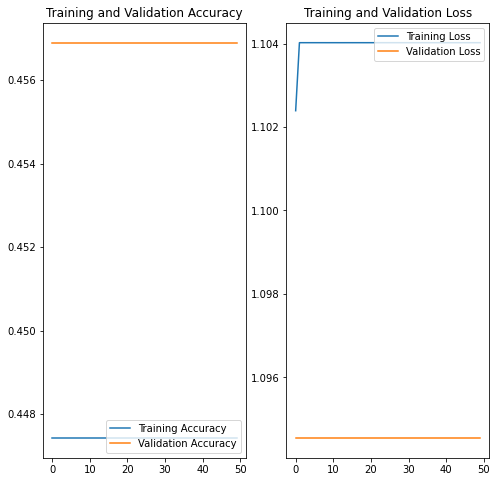

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode=None,
  #color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 292 files belonging to 1 classes.


In [19]:
predictions = model.predict(test_ds)

In [20]:
output = []
n = predictions.shape[0]
for i in range(n):
    score = tf.nn.softmax(predictions[i])
    label = np.argmax(score)
    output.append([i, label])

In [21]:
results = pd.DataFrame(output, columns = ['ID' , 'Label']) 

In [22]:
results.head()

,ID,Label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [23]:
results.to_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\submission.csv', index=False)

### Testing Another Method to Load Data 

In [24]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_image\train_image\0.png'
img = image.load_img(img_path, target_size=(512, 512, 1))
x = image.img_to_array(img)

In [25]:
x.shape

(512, 512, 3)

### Test transfer learning model MobileNetV2

In [26]:
# Create the base model from the pre-trained model MobileNet V2
#base_model = tf.keras.applications.MobileNetV2(input_shape=(512,512,3),
#                                               include_top=False,
#                                               weights='imagenet')


from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

base_model = ResNet50(input_shape=(512,512,3),
                                               include_top=False,
                                               weights='imagenet')


In [27]:
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [28]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 16, 16, 2048)


In [29]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  175


In [30]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [31]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [32]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [33]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [34]:
# construct model 

inputs = tf.keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [35]:
base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=['accuracy'])


model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [36]:
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 512, 512, 3)       0         
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 512, 512, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF [(None, 512, 512, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 16, 16, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)             

In [37]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
30/30 [==============================] - 286s 10s/step - loss: 1.2647 - accuracy: 0.3562 - val_loss: 1.0836 - val_accuracy: 0.4052
Epoch 2/50
30/30 [==============================] - 283s 9s/step - loss: 1.1469 - accuracy: 0.3820 - val_loss: 1.0716 - val_accuracy: 0.4310
Epoch 3/50
30/30 [==============================] - 284s 9s/step - loss: 1.0853 - accuracy: 0.4077 - val_loss: 1.0709 - val_accuracy: 0.4397
Epoch 4/50
30/30 [==============================] - 284s 9s/step - loss: 1.0858 - accuracy: 0.4313 - val_loss: 1.0704 - val_accuracy: 0.4569
Epoch 5/50
30/30 [==============================] - 284s 9s/step - loss: 1.0770 - accuracy: 0.4185 - val_loss: 1.0819 - val_accuracy: 0.4569
Epoch 6/50
30/30 [==============================] - 284s 9s/step - loss: 1.0816 - accuracy: 0.4335 - val_loss: 1.0792 - val_accuracy: 0.4569
Epoch 7/50
30/30 [==============================] - 284s 9s/step - loss: 1.0731 - accuracy: 0.4292 - val_loss: 1.0710 - val_accuracy: 0.4569
Epoch 8/50
3

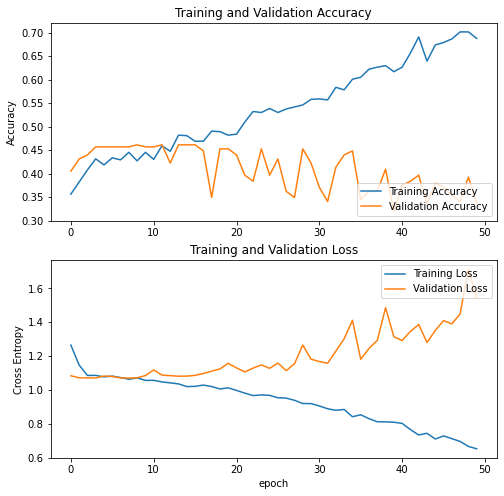

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [39]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode=None,
  #color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 292 files belonging to 1 classes.


In [40]:
predictions = model.predict(test_ds)

In [41]:
output = []
n = predictions.shape[0]
for i in range(n):
    score = tf.nn.softmax(predictions[i])
    label = np.argmax(score)
    output.append([i, label])

In [42]:
results = pd.DataFrame(output, columns = ['ID' , 'Label']) 

In [43]:
results.to_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\submission_mobilenet.csv', index=False)

### VGG16

In [44]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

import tensorflow.keras.utils


In [45]:
base_model = VGG16(input_shape=(512,512,3), 
                   include_top=False,
                   weights='imagenet')


In [46]:
base_model.trainable = False

In [47]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [48]:
#model = keras.Sequential()
#model.add(base_model)
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation="softmax"))

In [49]:
model = keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes,activation="softmax") 
])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 512, 512, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 771       
Total params: 48,270,147
Trainable params: 33,555,459
Non-trainable params: 14,714,688
_________________________________

In [51]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#model.compile(optimizer='adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

In [52]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
30/30 [==============================] - 384s 13s/step - loss: 1.1117 - accuracy: 0.4367 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 2/50
30/30 [==============================] - 384s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 3/50
30/30 [==============================] - 384s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 4/50
30/30 [==============================] - 384s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 5/50
30/30 [==============================] - 384s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 6/50
30/30 [==============================] - 385s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 7/50
30/30 [==============================] - 385s 13s/step - loss: 1.1040 - accuracy: 0.4474 - val_loss: 1.0945 - val_accuracy: 0.4569
Epoch 

KeyboardInterrupt: 